# 통계학
- 선형회귀
    - 전제조건
        - 선형성 : 비선형(ANN : artificial neural network)
            - 비선형에서 나타나는 문제 : 과적합 문제
            - 일반화되지 못하고 특정데이터에 과도하게 적합하는 문제
        - 독립성 : 
            - 다중공선성 :
            - 자기상관성 : 시계열분석
        - 정규성 :
            - 데이터 변환 : 제곱근 변환, log변환
        - 등분산성 

In [14]:
import pandas as pd
import numpy as np
df=pd.DataFrame({'key1' : ['영업부','영업부','관리부','관리부','영업부'],
                'key2' : ['남','여','남','여','남'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
print(df)

  key1 key2     data1     data2
0  영업부    남  1.674127  1.223424
1  영업부    여  0.628434  0.019913
2  관리부    남  0.381929  0.506561
3  관리부    여  0.445461  1.127473
4  영업부    남  1.280647 -0.975402


In [5]:
grouped=df.groupby(df['key1'])
print(grouped)
print("\n그룹평균 = \n", grouped.mean())
# chaining이 가능
df.groupby(df['key1']).mean()


그룹평균 = 
          data1     data2
key1                    
관리부  -0.153633 -0.479644
영업부  -0.337212  0.568592


,data1,data2
key1,,
관리부,-0.153633,-0.479644
영업부,-0.337212,0.568592


In [6]:
means=df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
관리부   남      -0.592880
      여       0.285614
영업부   남       0.122724
      여      -1.257086
Name: data1, dtype: float64

In [7]:
means.unstack()


key2,남,여
key1,,
관리부,-0.592880,0.285614
영업부,0.122724,-1.257086


In [8]:
mean_unstack=means.unstack()
mean_unstack.stack()

key1  key2
관리부   남      -0.592880
      여       0.285614
영업부   남       0.122724
      여      -1.257086
dtype: float64

In [9]:
df = pd.DataFrame({'A' : ['일반','일반','특수','예외'] * 6,
                  'B' : ['서울','대구','부산'] * 8,
                  'C' : ['건조','건조','건조','우기','우기','우기'] * 4,
                  'D' : np.random.randn(24),
                  'E' : np.random.randn(24)})
print(df)

     A   B   C         D         E
0   일반  서울  건조  0.167736  0.421917
1   일반  대구  건조  0.073818 -1.612060
2   특수  부산  건조  0.207170 -1.365274
3   예외  서울  우기 -0.094561 -1.514743
4   일반  대구  우기 -1.828647 -2.081392
5   일반  부산  우기 -0.310104  1.251709
6   특수  서울  건조  0.083352 -1.277504
7   예외  대구  건조  0.839133  0.268868
8   일반  부산  건조  0.394566  1.139187
9   일반  서울  우기 -0.490657 -0.195371
10  특수  대구  우기  0.260228  0.843104
11  예외  부산  우기  0.296236  0.788020
12  일반  서울  건조  0.624843  0.082901
13  일반  대구  건조 -0.841792 -0.253071
14  특수  부산  건조  0.418645 -2.678724
15  예외  서울  우기  0.209390 -1.155905
16  일반  대구  우기  0.456533  0.463957
17  일반  부산  우기 -0.900178  0.529840
18  특수  서울  건조 -1.125722 -2.182160
19  예외  대구  건조 -1.104963  0.078323
20  일반  부산  건조 -1.096283 -0.364099
21  일반  서울  우기  0.466091  0.020504
22  특수  대구  우기 -0.451433  1.277247
23  예외  부산  우기  1.762987  0.194268


In [10]:
df.A.unique()

array(['일반', '특수', '예외'], dtype=object)

In [11]:
pd.crosstab(df.A,df.B)

B,대구,부산,서울
A,,,
예외,2,2,2
일반,4,4,4
특수,2,2,2


In [12]:
pd.crosstab(df.A, df.C, margins=True)

C,건조,우기,All
A,,,
예외,2,4,6
일반,6,6,12
특수,4,2,6
All,12,12,24


In [13]:
# 계층적 인덱스
pd.crosstab([df.A, df.B], df.C, margins=True)

C       건조  우기  All
A   B              
예외  대구   2   0    2
    부산   0   2    2
    서울   0   2    2
일반  대구   2   2    4
    부산   2   2    4
    서울   2   2    4
특수  대구   0   2    2
    부산   2   0    2
    서울   2   0    2
All     12  12   24

In [14]:
pd.crosstab(df.A,df.B).apply(lambda r: r/r.sum(), axis=1) # 열방향으로

B,대구,부산,서울
A,,,
예외,0.333333,0.333333,0.333333
일반,0.333333,0.333333,0.333333
특수,0.333333,0.333333,0.333333


In [47]:
d = {
    'Name':['영구','일구','이구','삼구','사구','오구', '육구','칠구','팔구','박진','비옴','최훈'],
    'Exam':['중간고사','중간고사','중간고사','중간고사','중간고사','중간고사', '기말고사','기말고사','기말고사','기말고사','기말고사','기말고사'],
    
    'Subject':['수학','수학','수학','과학','과학','과학',  '수학','수학','수학','과학','과학','과학'],
    'Result':['Pass','Pass','Fail','Pass','Fail','Pass','Pass','Fail','Fail','Pass','Pass','Fail'],
    'Jumsu' : [ 100,80,70,60.,70,80,100,80,60,100,80,80]

}

 
df = pd.DataFrame(d,columns=['Name','Exam','Subject','Result','Jumsu'])
df.to_csv("jumsu.csv", index=False, header=False, encoding="UTF-8")
df = pd.read_csv("jumsu.csv", names=['Name','Exam','Subject','Result','Jumsu'], encoding='UTF-8')
df
# 과목별 패스 여부를 확인하시오
# 과목별로 분류하고 시험분별로 분류된 패스 여부를 확인하고 합계를 출력
# 시험별로 패스 여부를 확인하시오
# 시험별 이름별로 점수를 확인하시오 (범주형일 때는 카운팅)
# 시험별 과목별 점수를 확인하시오

,Name,Exam,Subject,Result,Jumsu
0,영구,중간고사,수학,Pass,100.0
1,일구,중간고사,수학,Pass,80.0
2,이구,중간고사,수학,Fail,70.0
3,삼구,중간고사,과학,Pass,60.0
4,사구,중간고사,과학,Fail,70.0
5,오구,중간고사,과학,Pass,80.0
6,육구,기말고사,수학,Pass,100.0
7,칠구,기말고사,수학,Fail,80.0
8,팔구,기말고사,수학,Fail,60.0
9,박진,기말고사,과학,Pass,100.0


In [48]:
pd.crosstab(df.Subject,df.Result)

Result,Fail,Pass
Subject,,
과학,2,4
수학,3,3


In [49]:
pd.crosstab([df.Subject,df.Exam],df.Result,margins=True)

Result        Fail  Pass  All
Subject Exam                 
과학      기말고사     1     2    3
        중간고사     1     2    3
수학      기말고사     2     1    3
        중간고사     1     2    3
All              5     7   12

In [50]:
pd.crosstab(df.Exam,df.Result)

Result,Fail,Pass
Exam,,
기말고사,3,3
중간고사,2,4


In [51]:
pd.crosstab(df.Name,df.Exam,df.Jumsu, aggfunc=np.sum, margins=True)

Exam,기말고사,중간고사,All
Name,,,
박진,100.0,NaN,100.0
비옴,80.0,NaN,80.0
사구,NaN,70.0,70.0
삼구,NaN,60.0,60.0
영구,NaN,100.0,100.0
오구,NaN,80.0,80.0
육구,100.0,NaN,100.0
이구,NaN,70.0,70.0
일구,NaN,80.0,80.0


In [52]:
pd.crosstab(df.Exam,df.Subject,df.Jumsu,aggfunc=np.sum,margins=True)

Subject,과학,수학,All
Exam,,,
기말고사,260.0,240.0,500.0
중간고사,210.0,250.0,460.0
All,470.0,490.0,960.0


In [53]:
-price를 clarity를 기준으로 boxplot을 출력하시오
-cut과 clarity 데이터를 군집화하고 그 size를 확인하시오
-clarity와 color간의 crosstab을 생성하고 barplot으로 시각화 하시오

SyntaxError: invalid syntax (<ipython-input-53-ca15f86d57e1>, line 1)

In [57]:
df = pd.read_csv("diamond.csv",encoding='UTF-8')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
33099,0.29,Ideal,E,IF,61.9,57.0,815,4.25,4.29,2.64
33100,0.38,Premium,D,SI1,59.1,58.0,815,4.77,4.74,2.81
33101,0.32,Very Good,E,VVS2,61.6,54.0,816,4.43,4.46,2.74
33102,0.34,Good,E,VS2,57.0,61.0,816,6.65,4.61,2.64


<AxesSubplot:title={'center':'price'}, xlabel='clarity'>

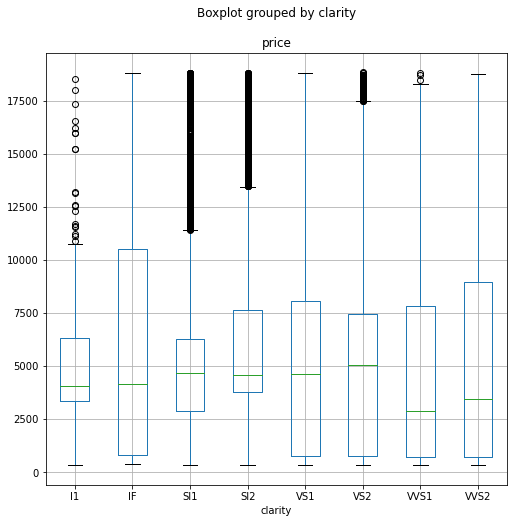

In [93]:
import matplotlib.pyplot as plt
df.boxplot(column="price", by='clarity',figsize=(8,8))

In [94]:
df.groupby(['cut','clarity']).size()

cut        clarity
Fair       I1          106
           IF            2
           SI1         273
           SI2         353
           VS1          97
           VS2         158
           VVS1         11
           VVS2         37
Good       I1           60
           IF           36
           SI1        1011
           SI2         823
           VS1         402
           VS2         654
           VVS1         93
           VVS2        155
Ideal      I1          125
           IF          324
           SI1        2731
           SI2        1851
           VS1        2005
           VS2        2777
           VVS1        800
           VVS2       1265
Premium    I1          138
           IF           90
           SI1        2471
           SI2        2302
           VS1        1258
           VS2        2194
           VVS1        244
           VVS2        455
Very Good  I1           61
           IF          135
           SI1        2128
           SI2        1591
         

In [96]:
clarity_color_table=pd.crosstab(df.clarity, df.color)
clarity_color_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,30,74,88,84,125,57,32
IF,53,51,103,162,120,77,21
SI1,1333,1466,1277,1218,1702,1086,532
SI2,962,1155,1141,1158,1300,790,414
VS1,345,611,776,1349,776,652,397
VS2,743,1191,1362,1603,1148,874,529
VVS1,99,227,296,432,298,141,38
VVS2,250,439,489,760,384,184,100


<AxesSubplot:xlabel='clarity'>

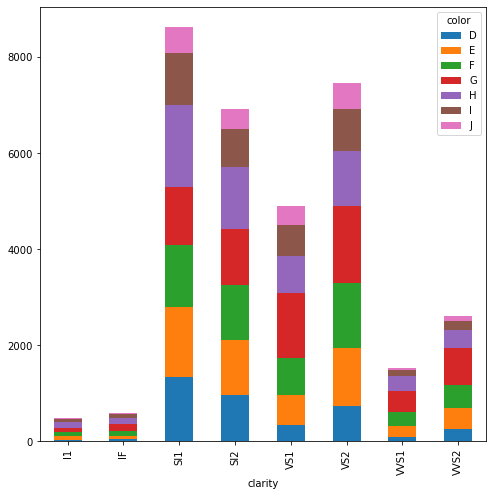

In [99]:
clarity_color_table.plot(kind='bar',figsize=(8,8),stacked=True)

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [102]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [103]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [104]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [106]:
# 미성년자와 성년
age = pd.cut(titanic['age'], [0,18,80]) # 영역은 n-1
titanic.pivot_table('survived', ['sex',age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [107]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [176]:
df=pd.read_csv("services.csv",encoding='utf8')
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"


In [178]:
print("최대행 보이기", pd.get_option("display.max_rows"))
print("최대열 보이기", pd.get_option("display.max_columns"))
print("열 넓이", pd.get_option("display.max_columns"))

최대행 보이기 60
최대열 보이기 20
열 넓이 20


In [110]:
# 불평의 종류(중복되지 않는)와 불평의 종류별 개수를 출력하시오
# 불평의 상위 10개를 출력하시오(sort_values)
# 불평의 상위 10개를 bar형태로 출력하시오
# 거주지별 불평의 갯수를 확인하시오
# 거주지와 불평의 크로스 테이블 생성
# 불평의 종류별로 카운트한 내용을 kde로 출력하시오
# 소음 불평(:Noise-Street/Sidewalk)이 많은 지역을 확인하시오
# 소음불평이 전체 불평에서 차지하는 비율을 출력하시오
# Borough : 거주지
# Complaint Type 불평

In [180]:
print(df['Complaint Type'].unique())
print(df.columns.nunique())
df['Complaint Type'].value_counts()

['Noise - Street/Sidewalk' 'Illegal Parking' 'Noise - Commercial'
 'Noise - Vehicle' 'Rodent' 'Blocked Driveway' 'Noise - House of Worship'
 'Street Light Condition' 'Harboring Bees/Wasps' 'Taxi Complaint'
 'Homeless Encampment' 'Traffic Signal Condition' 'Food Establishment'
 'Noise - Park' 'Broken Muni Meter' 'Benefit Card Replacement'
 'Sanitation Condition' 'ELECTRIC' 'PLUMBING' 'HEATING'
 'GENERAL CONSTRUCTION' 'Street Condition' 'Consumer Complaint'
 'Derelict Vehicles' 'Noise' 'Drinking' 'Indoor Air Quality' 'Panhandling'
 'Derelict Vehicle' 'Lead' 'Water System' 'Noise - Helicopter'
 'Homeless Person Assistance' 'Root/Sewer/Sidewalk Condition'
 'Sidewalk Condition' 'Graffiti' 'DOF Literature Request'
 'Animal in a Park' 'Overgrown Tree/Branches' 'Air Quality'
 'Dirty Conditions' 'Water Quality' 'Other Enforcement'
 'Collection Truck Noise' 'Illegal Tree Damage' 'Litter Basket / Request'
 'Violation of Park Rules' 'Maintenance or Facility' 'Sewer'
 'Agency Issues' 'Beach/Pool/Sa

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Stalled Sites                         1
Trans Fat                             1
DHS Income Savings Requirement        1
Tunnel Condition                      1
Snow                                  1
Name: Complaint Type, Length: 165, dtype: int64

In [182]:
df['Complaint Type'].value_counts().sort_values(ascending=False).head(10)

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

<AxesSubplot:>

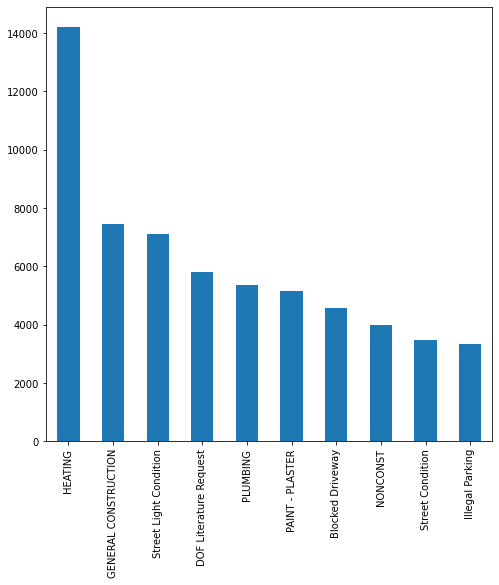

In [181]:
df['Complaint Type'].value_counts().head(10).plot(kind='bar',figsize=(8,8))

In [183]:
df.groupby(['Borough','Complaint Type'])['Complaint Type'].count()

Borough      Complaint Type                   
BRONX        APPLIANCE                            108
             Air Quality                           40
             Animal Abuse                         162
             Animal in a Park                      17
             Asbestos                              17
                                                 ... 
Unspecified  Taxi Compliment                       73
             Traffic Signal Condition              10
             Transportation Provider Complaint      1
             Vacant Lot                             3
             Water System                           2
Name: Complaint Type, Length: 638, dtype: int64

In [128]:
pd.crosstab(df['Borough'], df['Complaint Type'])

Complaint Type,APPLIANCE,Adopt-A-Basket,Agency Issues,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Borough,,,,,,,,,,,,,,,,,,,,,
BRONX,108,0,0,40,162,0,17,17,12,0,...,8,2,20,23,17,15,13,278,0,0
BROOKLYN,175,0,0,125,0,4,15,29,16,6,...,10,12,61,35,8,31,28,517,1,0
MANHATTAN,89,3,0,203,2,2,23,60,18,0,...,11,10,8,119,46,21,26,961,1,0
QUEENS,67,0,0,76,0,0,16,30,5,1,...,12,6,29,49,13,53,12,552,0,1
STATEN ISLAND,6,0,0,15,0,2,13,7,1,0,...,0,0,25,3,6,10,10,326,0,0
Unspecified,0,0,174,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,2,0,0


<AxesSubplot:xlabel='Complaint Type', ylabel='Density'>

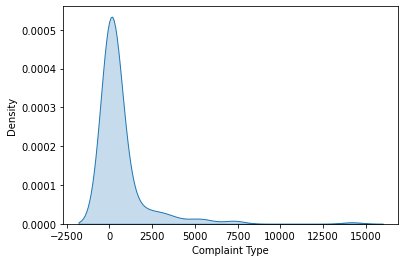

In [131]:
dataset1=df['Complaint Type'].value_counts()
sns.kdeplot(dataset1, shade=True)

In [146]:
#소음 불평(:Noise-Street/Sidewalk)이 많은 지역을 확인하시오
df[(df['Complaint Type']=='Noise - Street/Sidewalk')]['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

In [158]:
#소음불평이 전체 불평에서 차지하는 비율을 출력하시오
result=df['Complaint Type'][(df['Complaint Type']=='Noise - Street/Sidewalk')].count()/df['Complaint Type'].count()*100

In [170]:
round(result,2)

1.74

In [ ]:
# AR(auto regression), MA(moving average)
- 비정상적 데이터 -> 정상적 데이터
- 차분(diff)

In [ ]:
# 시간을 저장 => Tiemstamp 1970.1.1 이후로 지나간 시간을 저장 (linux)
- DateTime 날짜와 시간으로 변환
- Date / Time
- Timedelta 시간차를 저장
- python core(mm) / pandas (nano)

In [187]:
import datetime
date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30, second=19, microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7,
                      hour=12, minute=30, second=19, microsecond=463198)

print("date : ",date)
print("time : ",time)
print("dt : ",dt)

date :  2013-06-07
time :  12:30:19.463198
dt :  2013-06-07 12:30:19.463198


In [188]:
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20,
                        seconds=6.73, milliseconds=99, microseconds=8)
print(td)

19 days, 10:20:06.829008


In [189]:
import time
print(time.time())
print(time.localtime())

1620019823.9428694
time.struct_time(tm_year=2021, tm_mon=5, tm_mday=3, tm_hour=14, tm_min=30, tm_sec=23, tm_wday=0, tm_yday=123, tm_isdst=0)


In [190]:
time.strftime('%Y %m %d')

'2021 05 03'

In [191]:
from dateutil.parser import parse
parse('2020-07-19')
parse("Apr 16, 2016 04:05:32 PM")

datetime.datetime(2016, 4, 16, 16, 5, 32)

In [192]:
from datetime import date, time, datetime, timedelta
now = datetime.now()
print(now)
now.year, now.month, now.day
now.timestamp()

2021-05-03 14:32:46.920452


1620019966.920452

In [193]:
delta = datetime(2017, 11, 29) - datetime(2017,1,11,0,0)
print("timedelta 시간차값", delta)
print(delta.days)

timedelta 시간차값 322 days, 0:00:00
322


In [194]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(60)

datetime.datetime(2011, 3, 8, 0, 0)

In [ ]:
# pandas : Datetimeindex, date_range, to_datetime
- nano초로 정밀
- 인덱스로 사용

In [196]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [197]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [198]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [199]:
date + pd.to_timedelta(np.arange(12), 'D')# 날짜

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [201]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                        '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [202]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [203]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [204]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [205]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [206]:
# Business
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [207]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [208]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

<AxesSubplot:>

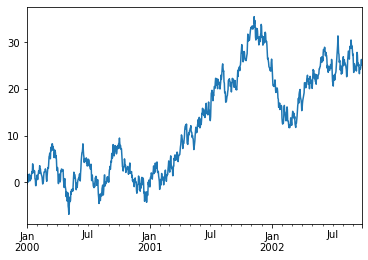

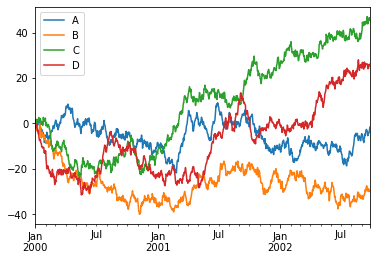

In [209]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot()

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


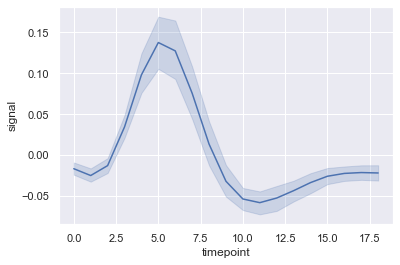

In [212]:
import seaborn as sns; sns.set() # 모델을 시각화 할때 사용
import matplotlib.pyplot as plt
fmri = sns.load_dataset("fmri")
print(fmri.head())
# tsplot
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

In [ ]:
- index
- shifting
- diff 차분
- lagging (window)
- resampling
    - upsampling - 기간이 늘어남 : ffill(forward), bffill(backward fill)
    - down sampling - 기간이 줄어 듬 : 집계(mean, sum)
- aggregation
- rolling

In [2]:
import pandas as pd
import numpy as np
ts = pd.Series(np.random.randn(100), index=pd.date_range(
    "2019-3-1", periods=100, freq="D"))
ts.head(20)

2019-03-01   -1.308001
2019-03-02   -0.689075
2019-03-03    0.978354
2019-03-04   -2.543535
2019-03-05    0.747048
2019-03-06   -0.066500
2019-03-07    1.336225
2019-03-08    0.008685
2019-03-09    0.949278
2019-03-10   -1.500059
2019-03-11    1.112835
2019-03-12   -0.352231
2019-03-13    1.845416
2019-03-14    0.000479
2019-03-15    1.941601
2019-03-16   -0.568608
2019-03-17    1.926747
2019-03-18   -1.178914
2019-03-19    0.001704
2019-03-20   -0.805990
Freq: D, dtype: float64

In [5]:
ts.resample('W')

In [4]:
ts.resample('W').mean()

2019-03-03   -0.339574
2019-03-10   -0.152694
2019-03-17    0.843748
2019-03-24   -0.044914
2019-03-31    0.147607
2019-04-07   -0.068801
2019-04-14   -0.501506
2019-04-21    0.141643
2019-04-28    0.222496
2019-05-05   -0.362033
2019-05-12   -0.158986
2019-05-19   -0.453565
2019-05-26    0.060862
2019-06-02   -0.078515
2019-06-09    0.254648
Freq: W-SUN, dtype: float64

In [6]:
ts = pd.Series(np.random.randn(60), index=pd.date_range(
    "2018-1-1", periods=60, freq="T"))
ts.head(20)

2018-01-01 00:00:00    2.114209
2018-01-01 00:01:00   -1.036980
2018-01-01 00:02:00    1.202018
2018-01-01 00:03:00   -0.521819
2018-01-01 00:04:00    0.123627
2018-01-01 00:05:00    0.763489
2018-01-01 00:06:00    1.179598
2018-01-01 00:07:00   -1.051141
2018-01-01 00:08:00    1.318629
2018-01-01 00:09:00    1.206320
2018-01-01 00:10:00    1.094190
2018-01-01 00:11:00   -1.030732
2018-01-01 00:12:00    0.277280
2018-01-01 00:13:00    0.807951
2018-01-01 00:14:00   -1.068414
2018-01-01 00:15:00   -1.354510
2018-01-01 00:16:00    0.683396
2018-01-01 00:17:00   -0.261286
2018-01-01 00:18:00   -0.221035
2018-01-01 00:19:00   -0.247828
Freq: T, dtype: float64

In [7]:
ts.resample('10T').sum()

2018-01-01 00:00:00    5.297949
2018-01-01 00:10:00   -1.320989
2018-01-01 00:20:00    1.475902
2018-01-01 00:30:00   -0.275077
2018-01-01 00:40:00   -4.304327
2018-01-01 00:50:00   -3.905128
Freq: 10T, dtype: float64

In [10]:
ts.resample('5T').ohlc() # 시초가, 최고가, 최저가, 종가

,open,high,low,close
2018-01-01 00:00:00,2.114209,2.114209,-1.036980,0.123627
2018-01-01 00:05:00,0.763489,1.318629,-1.051141,1.206320
2018-01-01 00:10:00,1.094190,1.094190,-1.068414,-1.068414
2018-01-01 00:15:00,-1.354510,0.683396,-1.354510,-0.247828
2018-01-01 00:20:00,1.245773,1.404362,-1.583124,-0.127052
2018-01-01 00:25:00,-0.127458,0.746205,-0.909315,0.538559
2018-01-01 00:30:00,0.025688,0.420548,-1.786301,-0.742794
2018-01-01 00:35:00,1.789030,1.789030,-1.054796,-0.520079
2018-01-01 00:40:00,0.018796,0.018796,-1.987310,-0.602696
2018-01-01 00:45:00,1.616311,1.616311,-2.243879,-0.310322


In [9]:
ts.resample('30s').ffill().head(20)

2018-01-01 00:00:00    2.114209
2018-01-01 00:00:30    2.114209
2018-01-01 00:01:00   -1.036980
2018-01-01 00:01:30   -1.036980
2018-01-01 00:02:00    1.202018
2018-01-01 00:02:30    1.202018
2018-01-01 00:03:00   -0.521819
2018-01-01 00:03:30   -0.521819
2018-01-01 00:04:00    0.123627
2018-01-01 00:04:30    0.123627
2018-01-01 00:05:00    0.763489
2018-01-01 00:05:30    0.763489
2018-01-01 00:06:00    1.179598
2018-01-01 00:06:30    1.179598
2018-01-01 00:07:00   -1.051141
2018-01-01 00:07:30   -1.051141
2018-01-01 00:08:00    1.318629
2018-01-01 00:08:30    1.318629
2018-01-01 00:09:00    1.206320
2018-01-01 00:09:30    1.206320
Freq: 30S, dtype: float64

In [11]:
import pandas as pd
import pandas_datareader.data as weg
gs = weg.DataReader("078930.KS", "yahoo","2018-01-01","2020-03-06")

In [12]:
gs.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-05,41300.0,40500.0,40650.0,41300.0,254575.0,39248.496094
2020-03-06,41000.0,39650.0,41000.0,40000.0,374898.0,38013.070312


In [13]:
ma5 = gs['Adj Close'].rolling(window=5).mean()
ma5.head(6)

Date
2018-01-03             NaN
2018-01-04             NaN
2018-01-05             NaN
2018-01-08             NaN
2018-01-09    54632.853125
2018-01-10    55338.703125
Name: Adj Close, dtype: float64

In [14]:
new_gs = gs[gs['Volume'] !=0]

In [15]:
ma20 = new_gs['Adj Close'].rolling(window=20).mean()
ma60 = new_gs['Adj Close'].rolling(window=60).mean()
ma120 = new_gs['Adj Close'].rolling(window=120).mean()
new_gs.insert(len(new_gs.columns), "MA20", ma20)
new_gs.insert(len(new_gs.columns), "MA60", ma60)
new_gs.insert(len(new_gs.columns), "MA120", ma120)


<AxesSubplot:xlabel='Date'>

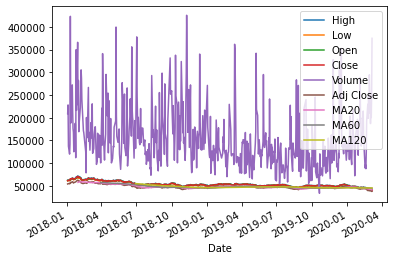

In [16]:
new_gs.plot()

<AxesSubplot:xlabel='Date'>

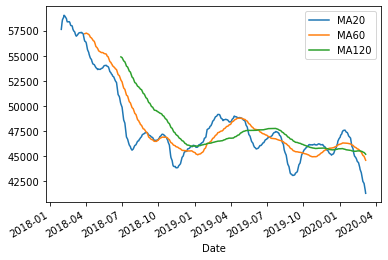

In [17]:
new_gs[['MA20','MA60','MA120']].plot()

In [18]:
# 10개의 데이터를 만들고 인덱스를 2000/1/1 10개를 만들어지정하시고 3분기마다 이동평균값을 구하시오

In [28]:
tt = pd.Series(np.random.randn(10), index=pd.date_range(
    "2018-1-1", periods=10))

In [27]:
tt.resample('9M').mean()

2018-01-31    0.425420
2018-10-31    0.571515
2019-07-31    0.295961
2020-04-30    1.153703
2021-01-31   -0.295464
Freq: 9M, dtype: float64

In [32]:
tt.rolling(window=3, win_type='triang').mean()

2018-01-01         NaN
2018-01-02         NaN
2018-01-03    0.599028
2018-01-04   -0.045254
2018-01-05   -0.191325
2018-01-06    0.421179
2018-01-07    0.461571
2018-01-08    0.016647
2018-01-09   -0.250427
2018-01-10   -0.720700
Freq: D, dtype: float64

In [34]:
tt.rolling(window=5, win_type='gaussian').mean(std=0.1)

2018-01-01         NaN
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05   -0.452086
2018-01-06   -0.545158
2018-01-07    0.777104
2018-01-08    0.675666
2018-01-09   -0.282154
2018-01-10   -0.044770
Freq: D, dtype: float64

# 기법모형으로 만들어진 arima 모형
- 비선형예측기, 계절을 고려해주고 일별 주기성을 띈 데이터에 강점을 가지는 모델

In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("AirPassengers.csv")
df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.describe()

,AirPassengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [5]:
df = df.rename(columns={'Month':'ds',
                       'AirPassengers':'y'})
df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


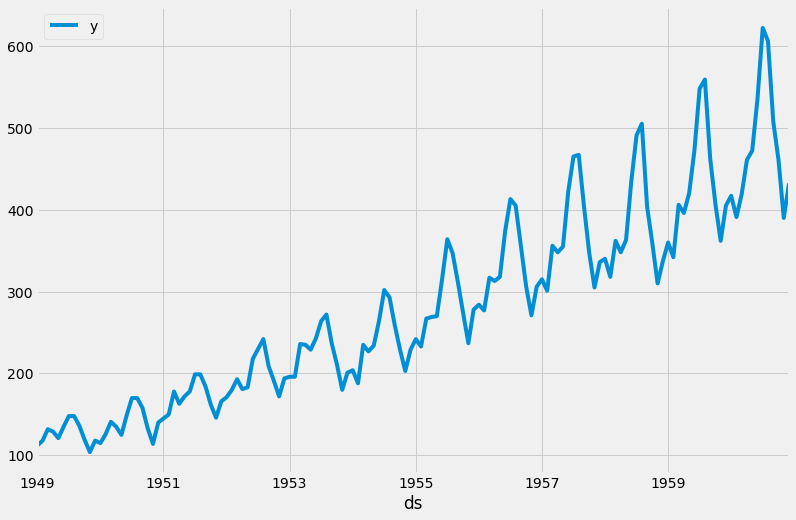

In [6]:
from matplotlib import pyplot as plt
ax = df.set_index('ds').plot(figsize=(12,8))
plt.show()

In [7]:
my_model = Prophet(interval_width=0.95)
my_model.daily_seasonality=True
my_model.weekly_seasonality=True

In [8]:
my_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [9]:
# MS : month start
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [10]:
forecast = my_model.predict(future_dates)
forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail() #95% 신뢰구간으로 예측

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,651.085273,607.761734,693.381036
176,1963-09-01,601.841805,556.557499,643.332605
177,1963-10-01,562.846388,516.692111,603.212655
178,1963-11-01,540.757111,499.935326,582.253416
179,1963-12-01,563.401288,520.260575,606.440055


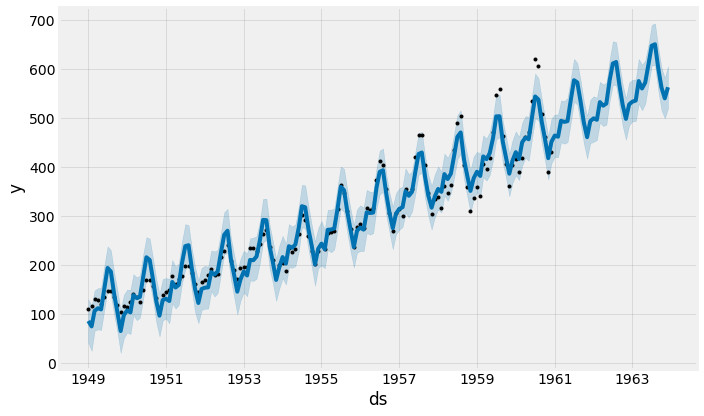

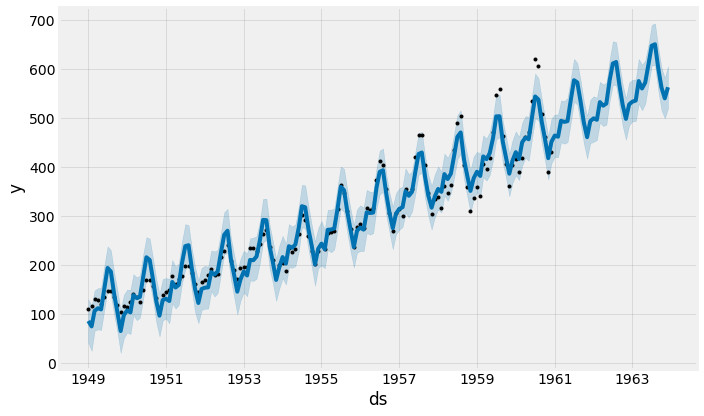

In [11]:
my_model.plot(forecast, uncertainty=True)

In [12]:
print(plt.style.available)
len(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


26

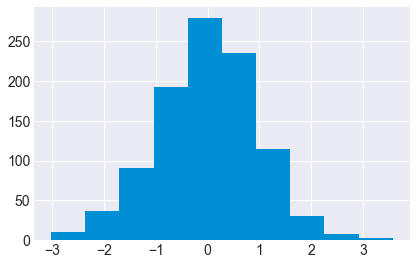

In [15]:
plt.style.use('seaborn-darkgrid')
x = np.random.randn(1000)
plt.hist(x);

In [22]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1,2,figsize=(11,4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a','b','c'], loc='lower left')

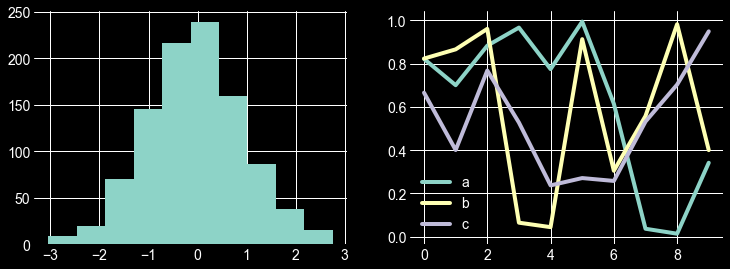

In [23]:
with plt.style.context('dark_background'):
    hist_and_lines()

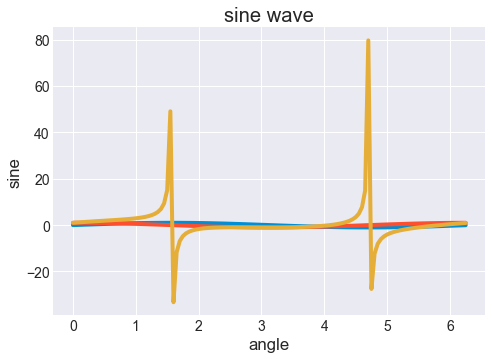

In [25]:
import math
x = np.arange(0, math.pi*2, 0.05)
y = np.sin(x)
z = np.cos(x)
t = np.tan(x)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.plot(x,z)
ax.plot(x,y+z+t)
ax.set_title("sine wave")
ax.set_xlabel('angle')
ax.set_ylabel('sine')
plt.show()

In [ ]:
# 삼각함수, 지수함수, 로그함수 : 초월함수
- 대수적으로 해를 풀수가 없음 : +=*/ : 근접해를 찾아

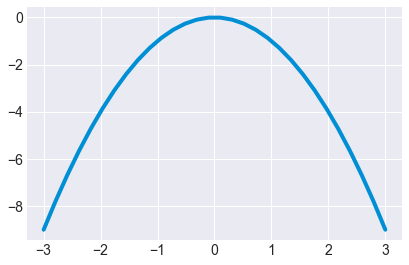

In [27]:
from numpy import *
from pylab import *
x = linspace(-3,3, 30) # 경사하강법으로 해를 찾아감 => 머신러닝에서 도입 (신경망)
y = -x**2
plot(x, y)
show()

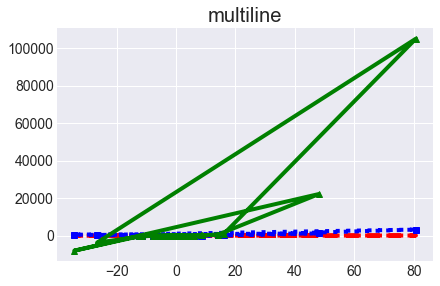

In [29]:
f = np.arange(0, 5., 0.2)
plt.title("multiline")
plt.plot(t, t, 'r--', t, 0.5 * t**2, 'bs:', t, 0.2 * t**3, 'g^-')
plt.show()

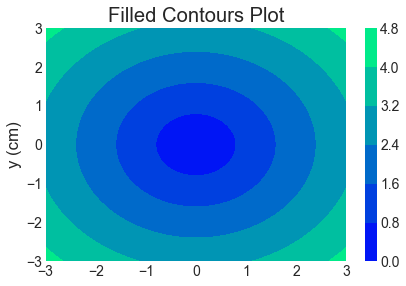

In [30]:
xlist = np.linspace(-3.0,3.0,100)
ylist = np.linspace(-3.0,3.0,100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
#영역을 나눔
cp = ax.contourf(X, Y, Z, levels = 5, cmap='winter')# 등고선 출력(fill)
fig.colorbar(cp)
ax.set_title("Filled Contours Plot")

ax.set_ylabel('y (cm)')
plt.show()

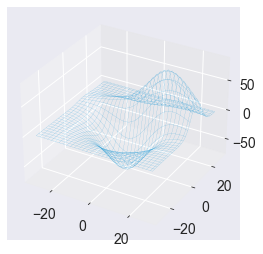

In [34]:
from mpl_toolkits.mplot3d import axes3d
ax = plt.subplot(111, projection='3d') # 3차원 행렬
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, linewidth=0.1)
plt.savefig('wire.pdf')
plt.show()

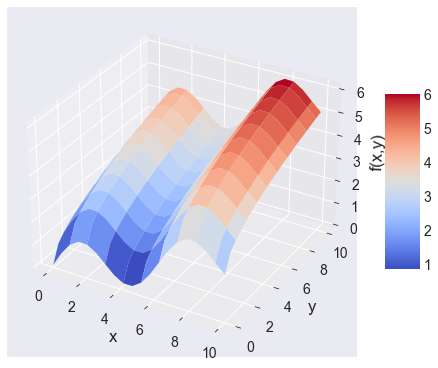

In [36]:
def fm(p):
    x,y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y)
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)

X, Y = np.meshgrid(x, y)#그물망 만들기

Z = fm((X, Y))
x = X.flatten() #복사되고 1차원
y = Y.flatten()

fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d') # get current axes
# row, column 건너뛰기
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
                      linewidth=0.5, antialiased=True)
# aliased=그래픽에서 나는 계단현상 격자로 1024 x 768 - 모서리를 부드럽게 출력
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

fig.colorbar(surf, shrink=0.5, aspect=5)